# Assignment 1

In [49]:
import time

class Timer:    
    def __enter__(self):
        self.start = time.time()
        return self

    def __exit__(self, *args):
        self.end = time.time()
        self.interval = self.end - self.start

In [46]:
import numpy as np

def diffusion_iteration(un):
    for i in range(1, N-1):
        for j in range(1, N-1):
            un[i, j] = (un[i+1,j] + un[i-1, j] + un[i, j+1] + un [i, j-1])/4
    return np.around(un, 2)

N = 10
u0 = np.ones((N, N), dtype='float64')
u0[int(N/2)-2:int(N/2)+2, int(N/2)-2:int(N/2)+2] = 10
print(u0)

for iteration in range(0,2):
    print(diffusion_iteration(u0))

[[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1. 10. 10. 10. 10.  1.  1.  1.]
 [ 1.  1.  1. 10. 10. 10. 10.  1.  1.  1.]
 [ 1.  1.  1. 10. 10. 10. 10.  1.  1.  1.]
 [ 1.  1.  1. 10. 10. 10. 10.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]]
[[1.   1.   1.   1.   1.   1.   1.   1.   1.   1.  ]
 [1.   1.   1.   1.   1.   1.   1.   1.   1.   1.  ]
 [1.   1.   1.   3.25 3.81 3.95 3.99 1.75 1.19 1.  ]
 [1.   1.   3.25 6.62 7.61 7.89 5.72 2.37 1.39 1.  ]
 [1.   1.   3.81 7.61 8.8  9.17 6.47 2.71 1.52 1.  ]
 [1.   1.   3.95 7.89 9.17 9.59 6.77 2.87 1.6  1.  ]
 [1.   1.   3.99 5.72 6.47 6.77 3.88 2.19 1.45 1.  ]
 [1.   1.   1.75 2.37 2.71 2.87 2.19 1.59 1.26 1.  ]
 [1.   1.   1.19 1.39 1.52 1.6  1.45 1.26 1.13 1.  ]
 [1.   1.   1.   1.   1.   1.   1.   1.   1.   1.  ]]
[[1.   1.   1.   1.   1.   1.   1.   1

In [76]:
import numpy as np

def diffusion_iteration(N):
    
    un = np.zeros((N, N), dtype='float64')
    un[1, 1:N-1] = 1
    
    for i in range(1, N-1):
        for j in range(1, N-1):
            un[i, j] = (un[i+1,j] + un[i-1, j] + un[i, j+1] + un [i, j-1])/4
    return un        


for array_size in range(100, 1100, 100):
    with Timer() as t:
        diffusion_iteration(array_size)
    print("array size: {}".format(array_size),"| time for process: {0}".format(t.interval))

array size: 100 | time for process: 0.012887716293334961
array size: 200 | time for process: 0.05136251449584961
array size: 300 | time for process: 0.11091899871826172
array size: 400 | time for process: 0.2003006935119629
array size: 500 | time for process: 0.3132505416870117
array size: 600 | time for process: 0.4526820182800293
array size: 700 | time for process: 0.616532564163208
array size: 800 | time for process: 0.8080761432647705
array size: 900 | time for process: 1.0306296348571777
array size: 1000 | time for process: 1.259427785873413


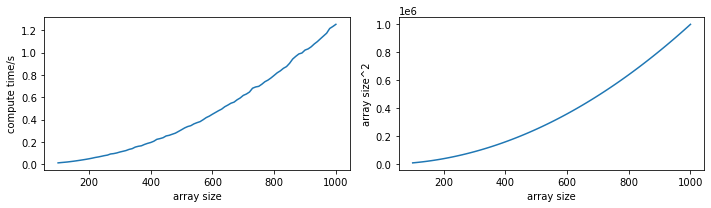

In [84]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

def diffusion_iteration(N):
    un = np.ones((N, N), dtype='float64')
    un[int(N/2)-2:int(N/2)+2, int(N/2)-2:int(N/2)+2] = 10
    
    for i in range(1, N-1):
        for j in range(1, N-1):
            un[i, j] = (un[i+1,j] + un[i-1, j] + un[i, j+1] + un [i, j-1])/4
    return un        

x = []
y = []


for array_size in range(100, 1010, 10):
    with Timer() as t:
        diffusion_iteration(array_size)
    x.append(array_size)
    y.append(t.interval)

fig = plt.figure(figsize=(10.0, 3.0))

axes1 = fig.add_subplot(1, 2, 1)
axes2 = fig.add_subplot(1, 2, 2)

axes1.set_ylabel("compute time/s")
axes1.set_xlabel("array size")
axes1.plot(x, y)

axes2.set_ylabel("array size^2")
axes2.set_xlabel("array size")
axes2.plot(x,np.square(x))

fig.tight_layout()

plt.show()

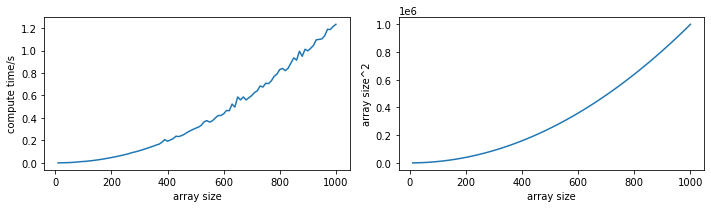

In [70]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

def diffusion_iteration(un, N):
    
    un1 = np.copy(un)
    for i in range(1, N-1):
        for j in range(1, N-1):
            un1[i, j] = (un[i+1,j] + un[i-1, j] + un[i, j+1] + un [i, j-1])/4
    np.copyto(un, un1)          
    return un

x = []
y = []


for array_size in range(10,1001,10):
    
    u0 = np.zeros((array_size, array_size), dtype='float64')
    u0[int(array_size/2)-2:int(array_size/2)+2, int(array_size/2)-2:int(array_size/2)+2] = 1
    
    with Timer() as t:
        diffusion_iteration(u0, array_size)
    x.append(array_size)
    y.append(t.interval)

fig = plt.figure(figsize=(10.0, 3.0))

axes1 = fig.add_subplot(1, 2, 1)
axes2 = fig.add_subplot(1, 2, 2)

axes1.set_ylabel("compute time/s")
axes1.set_xlabel("array size")
axes1.plot(x, y)

axes2.set_ylabel("array size^2")
axes2.set_xlabel("array size")
axes2.plot(x,np.square(x))

fig.tight_layout()

plt.show()

In [73]:
import numpy as np

def diffusion_iteration(un):
    un1 = np.copy(un)
    for i in range(1, N-1):
        for j in range(1, N-1):
            un1[i, j] = (un[i+1,j] + un[i-1, j] + un[i, j+1] + un [i, j-1])/4
    np.copyto(un, un1)
    return np.around(un, 3)
    

N = 10
u0 = np.zeros((N, N), dtype='float64')
u0[int(N/2)-2:int(N/2)+2, int(N/2)-2:int(N/2)+2] = 10
print(u0)

for interations in range(0,200):
    print(diffusion_iteration(u0))

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 10. 10. 10. 10.  0.  0.  0.]
 [ 0.  0.  0. 10. 10. 10. 10.  0.  0.  0.]
 [ 0.  0.  0. 10. 10. 10. 10.  0.  0.  0.]
 [ 0.  0.  0. 10. 10. 10. 10.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
[[ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   2.5  2.5  2.5  2.5  0.   0.   0. ]
 [ 0.   0.   2.5  5.   7.5  7.5  5.   2.5  0.   0. ]
 [ 0.   0.   2.5  7.5 10.  10.   7.5  2.5  0.   0. ]
 [ 0.   0.   2.5  7.5 10.  10.   7.5  2.5  0.   0. ]
 [ 0.   0.   2.5  5.   7.5  7.5  5.   2.5  0.   0. ]
 [ 0.   0.   0.   2.5  2.5  2.5  2.5  0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]]
[[0.    0.    0.    0.    0.    0.    